In [1]:
# import sys
# import numpy as np
# import pickle
# import os
# import matplotlib.pyplot as plt
# %matplotlib inline

# import cv2
# import time
# import itertools
# import random

# from sklearn.utils import shuffle

# import tensorflow as tf
# from keras.models import Sequential
# from keras.optimizers import Adam, RMSprop
# from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout
# from keras.models import Model
# from keras.models import Sequential
# from keras.layers import Dense, BatchNormalization
# from keras.layers.normalization import BatchNormalization
# from keras.layers.pooling import MaxPooling2D
# from tensorflow.keras.layers.merge import Concatenate
# from keras.layers.core import Lambda, Flatten, Dense
# from keras.initializers import glorot_uniform

# from keras.engine.topology import Layer
# from keras.regularizers import l2
# from keras import backend as K
# from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import sys
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, Dropout
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
# from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from tensorflow.python.keras.layers import Layer
# from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/BHSig260.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-20.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-19.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-18.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-17.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-16.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-15.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-14.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-13.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-12.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-11.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-10.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-09.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-08.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-07.tif  
  inflating: /content/BHSig260/Bengali/091/B-S-91-G-06.tif  
  inflating: /content/BHSig260/Ben

In [6]:
path = "/content/BHSig260/Hindi/"

In [7]:
# Get the list of all directories and sort them
dir_list = next(os.walk(path))[1]
dir_list.sort()

In [8]:
# For each person segregate the genuine signatures from the forged signatures
# Genuine signatures are stored in the list "orig_groups"
# Forged signatures are stored in the list "forged_groups"
orig_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir(path+directory)
    images.sort()
    images = [path+directory+'/'+x for x in images]
    forg_groups.append(images[:30]) # First 30 signatures in each folder are forrged
    orig_groups.append(images[30:]) # Next 24 signatures are genuine

In [9]:
# Quick check to confirm we have data of all the 160 individuals
len(orig_groups), len(forg_groups)

(160, 160)

In [10]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]

In [11]:
# Quick check to confirm that there are 24 Genuine signatures for each individual
print(orig_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


In [12]:
# Quick check to confirm that there are 30 Forged signatures for each individual
print(forg_lengths)

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


#### Train-Validation-Test Split
* Signatures of 120 people are used for training
* Signatures of 20 people are used for validation
* Signatures of 20 people are used for testing

In [13]:
orig_train, orig_val, orig_test = orig_groups[:120], orig_groups[120:140], orig_groups[140:]
forg_train, forg_val, forg_test = forg_groups[:120], forg_groups[120:140], forg_groups[140:]

In [14]:
# Delete unnecessary variables
del orig_groups, forg_groups

In [15]:
# All the images will be converted to the same size before processing
img_h, img_w = 155, 220

In [16]:
def visualize_sample_signature():
    '''Function to randomly select a signature from train set and
    print two genuine copies and one forged copy'''
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 10))
    k = np.random.randint(len(orig_train))
    orig_img_names = random.sample(orig_train[k], 2)
    forg_img_name = random.sample(forg_train[k], 1)
    orig_img1 = cv2.imread(orig_img_names[0], 0)
    orig_img2 = cv2.imread(orig_img_names[1], 0)
    forg_img = plt.imread(forg_img_name[0], 0)
    orig_img1 = cv2.resize(orig_img1, (img_w, img_h))
    orig_img2 = cv2.resize(orig_img2, (img_w, img_h))
    forg_img = cv2.resize(forg_img, (img_w, img_h))

    ax1.imshow(orig_img1, cmap = 'gray')
    ax2.imshow(orig_img2, cmap = 'gray')
    ax3.imshow(forg_img, cmap = 'gray')

    ax1.set_title('Genuine Copy')
    ax1.axis('off')
    ax2.set_title('Genuine Copy')
    ax2.axis('off')
    ax3.set_title('Forged Copy')
    ax3.axis('off')

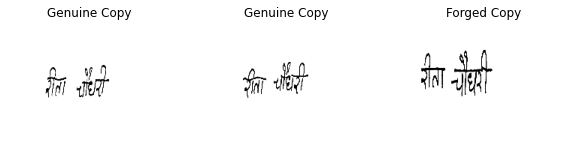

In [17]:
visualize_sample_signature()

In [ ]:
visualize_sample_signature()

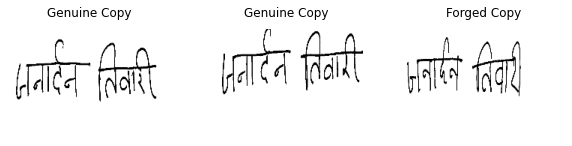

In [19]:
visualize_sample_signature()

In [ ]:
visualize_sample_signature()

In [ ]:
visualize_sample_signature()

In [ ]:
visualize_sample_signature()

In [ ]:
visualize_sample_signature()

In [ ]:
visualize_sample_signature()

In [ ]:
visualize_sample_signature()

In [20]:
def generate_batch(orig_groups, forg_groups, batch_size = 32):
    '''Function to generate a batch of data with batch_size number of data points
    Half of the data points will be Genuine-Genuine pairs and half will be Genuine-Forged pairs'''
    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []
        
        # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 24 genuine signatures, hence we have 
        # 24 choose 2 = 276 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 24 * 12 = 300 Genuine-Forged image pairs for one person.
        # In all we have 120 person's data in the training data.
        # Total no. of Genuine-Genuine pairs = 120 * 276 = 33120
        # Total number of Genuine-Forged pairs = 120 * 300 = 36000
        # Total no. of data points = 33120 + 36000 = 69120
        for orig, forg in zip(orig_groups, forg_groups):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
                forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, 12))))
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)
        
        # Note the lists above contain only the image names and
        # actual images are loaded and yielded below in batches
        # Below we prepare a batch of data points and yield the batch
        # In each batch we load "batch_size" number of image pairs
        # These images are then removed from the original set so that
        # they are not added again in the next batch.
            
        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]
        targets=np.zeros((batch_size,))
        for ix, pair in enumerate(all_pairs):
            img1 = cv2.imread(pair[0], 0)
            img2 = cv2.imread(pair[1], 0)
            img1 = cv2.resize(img1, (img_w, img_h))
            img2 = cv2.resize(img2, (img_w, img_h))
            img1 = np.array(img1, dtype = np.float64)
            img2 = np.array(img2, dtype = np.float64)
            img1 /= 255
            img2 /= 255
            img1 = img1[..., np.newaxis]
            img2 = img2[..., np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]
            k += 1
            if k == batch_size:
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]
                targets=np.zeros((batch_size,))

In [21]:
def euclidean_distance(vects):
    '''Compute Euclidean Distance between two vectors'''
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

In [22]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [23]:
def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

In [52]:
# def create_base_network_signet(input_shape):
#     '''Base Siamese Network'''
    
#     seq = Sequential()
#     seq.add(Conv2D(96, kernel_size=(11, 11), activation='relu', name='conv1_1', strides=4, input_shape= input_shape, 
#                         init='glorot_uniform', dim_ordering='tf'))
#     seq.add(BatchNormalization(epsilon=1e-06, mode=0, axis=1, momentum=0.9))
#     seq.add(MaxPooling2D((3,3), strides=(2, 2)))    
#     seq.add(ZeroPadding2D((2, 2), dim_ordering='tf'))
    
#     seq.add(Conv2D(256, kernel_size=(5, 5), activation='relu', name='conv2_1', strides=1, init='glorot_uniform',  dim_ordering='tf'))
#     seq.add(BatchNormalization(epsilon=1e-06, mode=0, axis=1, momentum=0.9))
#     seq.add(MaxPooling2D((3,3), strides=(2, 2)))
#     seq.add(Dropout(0.3))# added extra
#     seq.add(ZeroPadding2D((1, 1), dim_ordering='tf'))
    
#     seq.add(Conv2D(384, kernel_size=(3, 3), activation='relu', name='conv3_1', strides=1, init='glorot_uniform',  dim_ordering='tf'))
#     seq.add(ZeroPadding2D((1, 1), dim_ordering='tf'))
    
#     seq.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv3_2', strides=1, init='glorot_uniform', dim_ordering='tf'))    
#     seq.add(MaxPooling2D((3,3), strides=(2, 2)))
#     seq.add(Dropout(0.3))# added extra
#     seq.add(Flatten(name='flatten'))
#     seq.add(Dense(1024, W_regularizer=l2(0.0005), activation='relu', init='glorot_uniform'))
#     seq.add(Dropout(0.5))
    
#     seq.add(Dense(128, W_regularizer=l2(0.0005), activation='relu', init='glorot_uniform')) # softmax changed to relu
    
#     return seq
def create_base_network_signet(input_shape):
    '''Base Siamese Network'''
    
    seq = Sequential()
    seq.add(Conv2D(96, kernel_size=(11, 11), activation='relu', name='conv1_1', strides=4, input_shape= input_shape, 
                        kernel_initializer='glorot_uniform', data_format='channels_last'))
    seq.add(BatchNormalization(epsilon=1e-06, axis=1, momentum=0.9))
    seq.add(MaxPooling2D((3,3), strides=(2, 2)))    
    seq.add(ZeroPadding2D((2, 2), data_format='channels_last'))
    
    seq.add(Conv2D(256, kernel_size=(5, 5), activation='relu', name='conv2_1', strides=1, kernel_initializer='glorot_uniform',  data_format='channels_last'))
    seq.add(BatchNormalization(epsilon=1e-06, axis=1, momentum=0.9))
    seq.add(MaxPooling2D((3,3), strides=(2, 2)))
    seq.add(Dropout(0.3))# added extra
    seq.add(ZeroPadding2D((1, 1), data_format='channels_last'))
    
    seq.add(Conv2D(384, kernel_size=(3, 3), activation='relu', name='conv3_1', strides=1, kernel_initializer='glorot_uniform',  data_format='channels_last'))
    seq.add(ZeroPadding2D((1, 1), data_format='channels_last'))
    
    seq.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv3_2', strides=1, kernel_initializer='glorot_uniform', data_format='channels_last'))    
    seq.add(MaxPooling2D((3,3), strides=(2, 2)))
    seq.add(Dropout(0.3))# added extra
    seq.add(Flatten(name='flatten'))
    seq.add(Dense(1024, kernel_regularizer=l2(0.0005), activation='relu', kernel_initializer='glorot_uniform'))
    seq.add(Dropout(0.5))
    
    seq.add(Dense(128, kernel_regularizer=l2(0.0005), activation='relu', kernel_initializer='glorot_uniform')) # softmax changed to relu
    
    return seq

In [53]:
input_shape=(img_h, img_w, 1)

In [54]:
# network definition
base_network = create_base_network_signet(input_shape)

input_a = Input(shape=(input_shape))
input_b = Input(shape=(input_shape))

# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Compute the Euclidean distance between the two vectors in the latent space
distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model(inputs=[input_a, input_b], outputs=distance)

In [55]:
batch_sz = 128
num_train_samples = 276*120 + 300*120
num_val_samples = num_test_samples = 276*20 + 300*20
num_train_samples, num_val_samples, num_test_samples

(69120, 11520, 11520)

In [64]:
# compile model using RMSProp Optimizer and Contrastive loss function defined above
rms = RMSprop(learning_rate=1e-4, rho=0.9, epsilon=1e-08)
model.compile(loss=contrastive_loss, optimizer=rms)

In [65]:
# Using Keras Callbacks, save the model after every epoch
# Reduce the learning rate by a factor of 0.1 if the validation loss does not improve for 5 epochs
# Stop the training using early stopping if the validation loss does not improve for 12 epochs
callbacks = [
    EarlyStopping(patience=12, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint('/content/Weights/signet-bhsig260-{epoch:03d}.h5', verbose=1, save_weights_only=True)
]

In [66]:
results = model.fit_generator(generate_batch(orig_train, forg_train, batch_sz),
                              steps_per_epoch = num_train_samples//batch_sz,
                              epochs = 25,
                              validation_data = generate_batch(orig_val, forg_val, batch_sz),
                              validation_steps = num_val_samples//batch_sz,
                              callbacks = callbacks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
540/540 [==============================] - ETA: 0s - loss: 0.8230
Epoch 1: saving model to /content/Weights/signet-bhsig260-001.h5
540/540 [==============================] - 217s 399ms/step - loss: 0.8230 - val_loss: 0.6281 - lr: 1.0000e-04
Epoch 2/25
540/540 [==============================] - ETA: 0s - loss: 0.2498
Epoch 2: saving model to /content/Weights/signet-bhsig260-002.h5
540/540 [==============================] - 210s 389ms/step - loss: 0.2498 - val_loss: 0.1724 - lr: 1.0000e-04
Epoch 3/25
540/540 [==============================] - ETA: 0s - loss: 0.0934
Epoch 3: saving model to /content/Weights/signet-bhsig260-003.h5
540/540 [==============================] - 210s 390ms/step - loss: 0.0934 - val_loss: 0.1596 - lr: 1.0000e-04
Epoch 4/25
540/540 [==============================] - ETA: 0s - loss: 0.0455
Epoch 4: saving model to /content/Weights/signet-bhsig260-004.h5
540/540 [==============================] - 198s 367ms/step - loss: 0.0455 - val_loss: 0.1483 - lr: 1.0

KeyboardInterrupt: ignored

#### After observing continuous fall in validation accuracy, I interrupted the training manually

In [67]:
def compute_accuracy_roc(predictions, labels):
    '''Compute ROC accuracy with a range of thresholds on distances.
    '''
    dmax = np.max(predictions)
    dmin = np.min(predictions)
    nsame = np.sum(labels == 1)
    ndiff = np.sum(labels == 0)
   
    step = 0.01
    max_acc = 0
    best_thresh = -1
   
    for d in np.arange(dmin, dmax+step, step):
        idx1 = predictions.ravel() <= d
        idx2 = predictions.ravel() > d
       
        tpr = float(np.sum(labels[idx1] == 1)) / nsame       
        tnr = float(np.sum(labels[idx2] == 0)) / ndiff
        acc = 0.5 * (tpr + tnr)       
#       print ('ROC', acc, tpr, tnr)
       
        if (acc > max_acc):
            max_acc, best_thresh = acc, d
           
    return max_acc, best_thresh

#### Load the weights from the epoch which gave the best validation accuracy

In [68]:
model.load_weights('/content/Weights/signet-bhsig260-009.h5')

In [69]:
test_gen = generate_batch(orig_test, forg_test, 1)
pred, tr_y = [], []
for i in range(num_test_samples):
    (img1, img2), label = next(test_gen)
    tr_y.append(label)
    pred.append(model.predict([img1, img2])[0][0])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step


In [70]:
tr_acc, threshold = compute_accuracy_roc(np.array(pred), np.array(tr_y))
tr_acc, threshold

(0.8334025476079824, 0.45000114828412735)

#### Accuracy = 81.71% and Threshold = 0.55
Thus if the differnce score is less than 0.55, we predict the test image as Genuine and if the difference score is greater than 0.55, we predict it to be as forged

#### Below we see some sample results

In [71]:
def predict_score():
    '''Predict distance score and classify test images as Genuine or Forged'''
    test_point, test_label = next(test_gen)
    img1, img2 = test_point[0], test_point[1]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')
    ax1.set_title('Genuine')
    if test_label == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score = ", diff)
    if diff > threshold:
        print("Its a Forged Signature")
    else:
        print("Its a Genuine Signature")

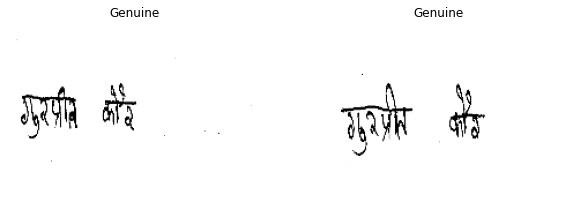

1/1 [==============================] - 0s 23ms/step
Difference Score =  0.036001705
Its a Genuine Signature


In [72]:
predict_score()

### Note: The first image is always Genuine. Score prediction and classification is done for the second image

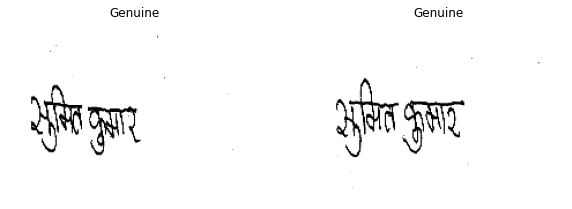

1/1 [==============================] - 0s 21ms/step
Difference Score =  0.097291656
Its a Genuine Signature


In [73]:
predict_score()

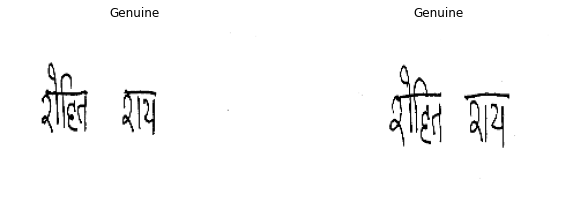

1/1 [==============================] - 0s 23ms/step
Difference Score =  0.5935741
Its a Forged Signature


In [74]:
predict_score()

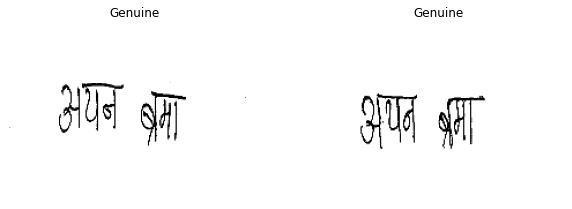

1/1 [==============================] - 0s 24ms/step
Difference Score =  0.15292746
Its a Genuine Signature


In [75]:
predict_score()

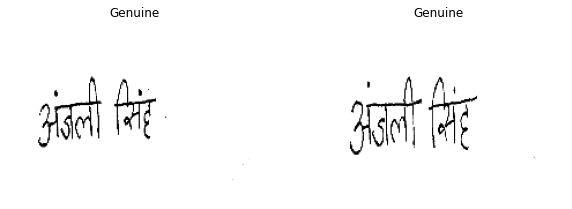

1/1 [==============================] - 0s 23ms/step
Difference Score =  0.68799263
Its a Forged Signature


In [76]:
predict_score()

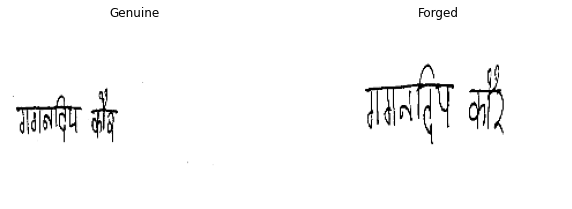

1/1 [==============================] - 0s 24ms/step
Difference Score =  1.194474
Its a Forged Signature


In [77]:
predict_score()

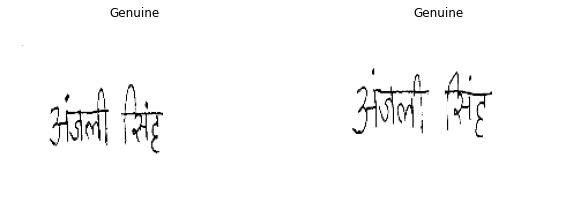

1/1 [==============================] - 0s 21ms/step
Difference Score =  0.095433615
Its a Genuine Signature


In [78]:
predict_score()

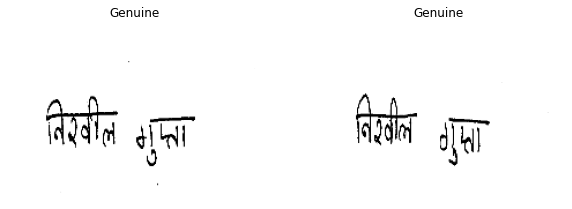

1/1 [==============================] - 0s 23ms/step
Difference Score =  0.058810554
Its a Genuine Signature


In [79]:
predict_score()

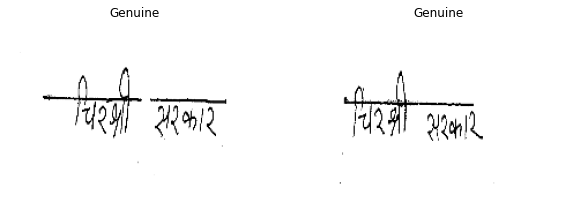

1/1 [==============================] - 0s 24ms/step
Difference Score =  0.23681043
Its a Genuine Signature


In [80]:
predict_score()

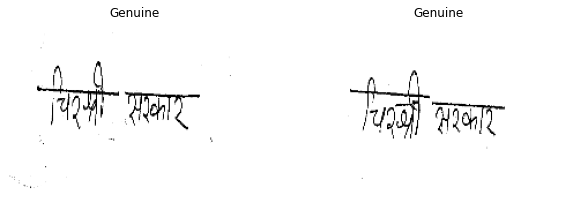

1/1 [==============================] - 0s 22ms/step
Difference Score =  0.64072376
Its a Forged Signature


In [81]:
predict_score()

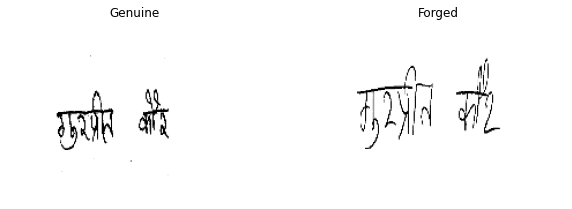

1/1 [==============================] - 0s 21ms/step
Difference Score =  0.7727674
Its a Forged Signature


In [82]:
predict_score()

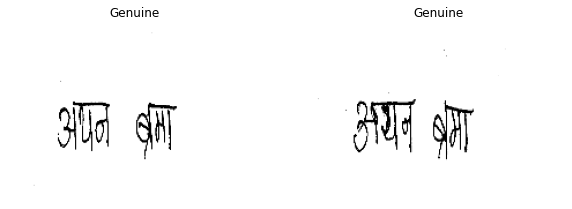

1/1 [==============================] - 0s 22ms/step
Difference Score =  0.53000027
Its a Forged Signature


In [83]:
predict_score()

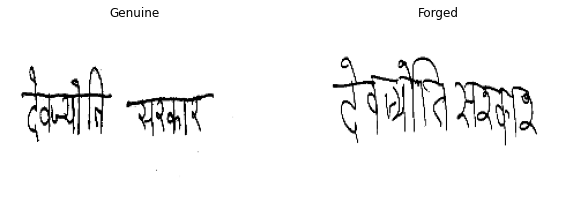

1/1 [==============================] - 0s 28ms/step
Difference Score =  0.25757548
Its a Genuine Signature


In [84]:
predict_score()

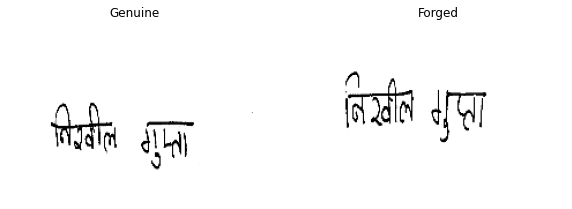

1/1 [==============================] - 0s 25ms/step
Difference Score =  0.13682033
Its a Genuine Signature


In [85]:
predict_score()

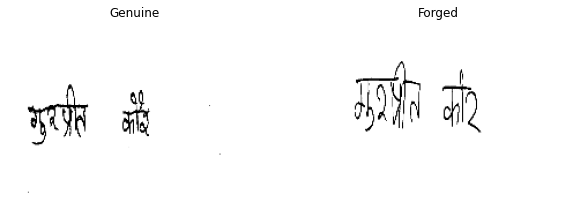

1/1 [==============================] - 0s 30ms/step
Difference Score =  0.89788276
Its a Forged Signature


In [86]:
predict_score()

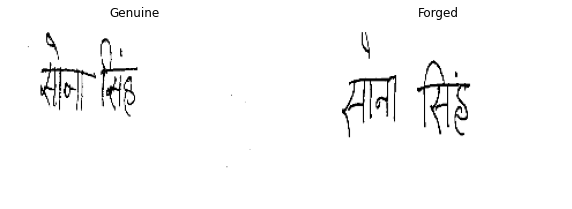

1/1 [==============================] - 0s 24ms/step
Difference Score =  0.89992136
Its a Forged Signature


In [87]:
predict_score()

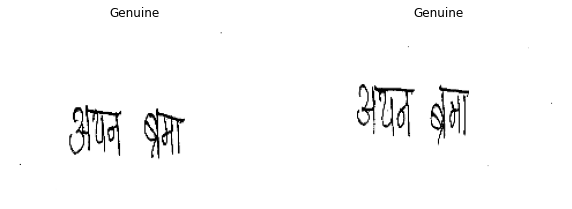

1/1 [==============================] - 0s 29ms/step
Difference Score =  0.078043155
Its a Genuine Signature


In [89]:
predict_score()

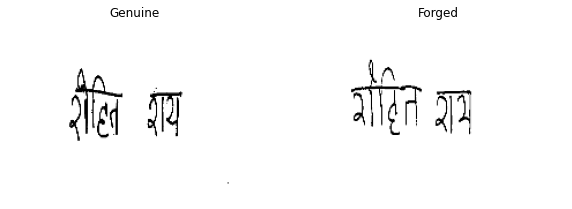

1/1 [==============================] - 0s 24ms/step
Difference Score =  0.87458307
Its a Forged Signature


In [90]:
predict_score()

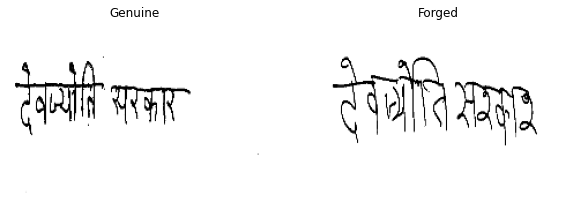

1/1 [==============================] - 0s 22ms/step
Difference Score =  0.59635967
Its a Forged Signature


In [91]:
predict_score()

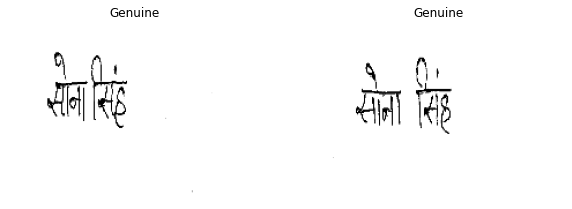

1/1 [==============================] - 0s 23ms/step
Difference Score =  0.03766711
Its a Genuine Signature


In [92]:
predict_score()

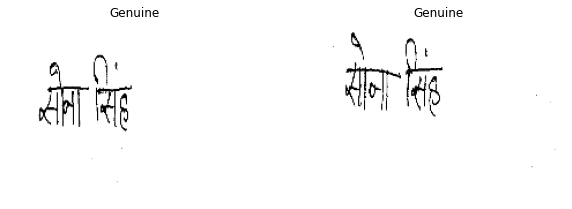

1/1 [==============================] - 0s 26ms/step
Difference Score =  0.23283978
Its a Genuine Signature


In [93]:
predict_score()

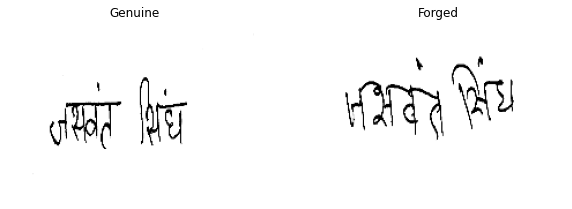

1/1 [==============================] - 0s 23ms/step
Difference Score =  0.84578496
Its a Forged Signature


In [94]:
predict_score()

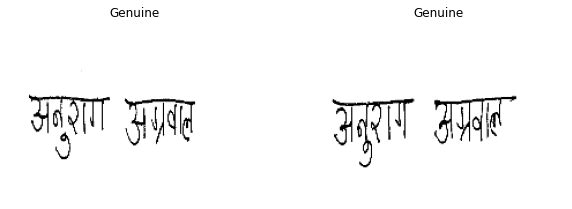

1/1 [==============================] - 0s 26ms/step
Difference Score =  0.21112145
Its a Genuine Signature


In [95]:
predict_score()

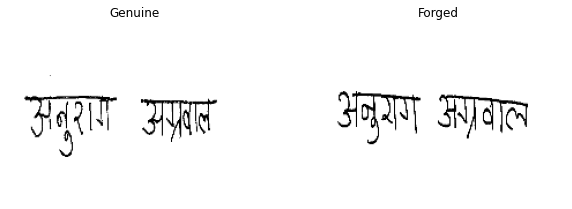

1/1 [==============================] - 0s 27ms/step
Difference Score =  0.037097108
Its a Genuine Signature


In [96]:
predict_score()

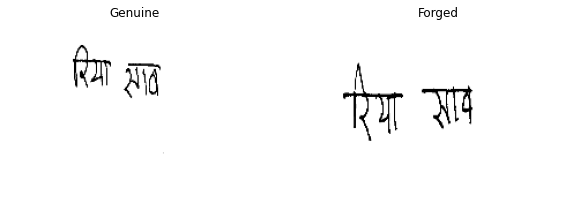

1/1 [==============================] - 0s 25ms/step
Difference Score =  1.572805
Its a Forged Signature


In [97]:
predict_score()

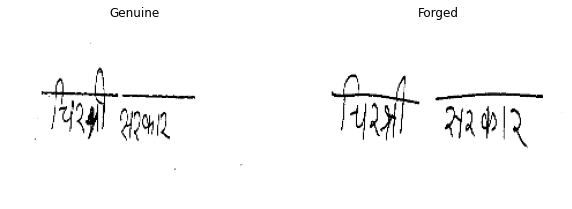

1/1 [==============================] - 0s 24ms/step
Difference Score =  0.6734673
Its a Forged Signature


In [98]:
predict_score()

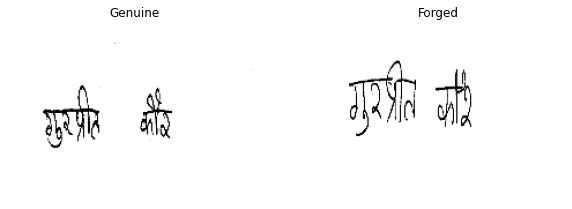

1/1 [==============================] - 0s 25ms/step
Difference Score =  1.0659468
Its a Forged Signature


In [99]:
predict_score()

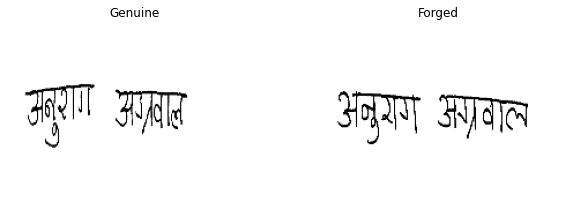

1/1 [==============================] - 0s 24ms/step
Difference Score =  0.26197928
Its a Genuine Signature


In [100]:
predict_score()

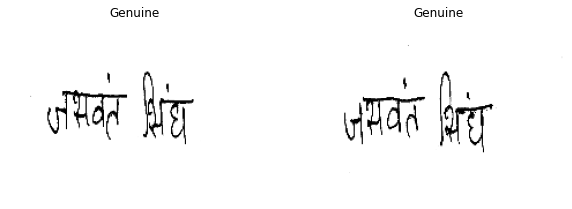

1/1 [==============================] - 0s 24ms/step
Difference Score =  0.030777238
Its a Genuine Signature


In [101]:
predict_score()

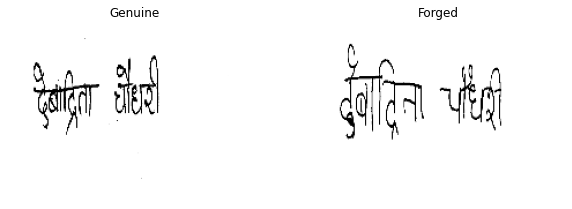

1/1 [==============================] - 0s 24ms/step
Difference Score =  1.1163125
Its a Forged Signature


In [102]:
predict_score()

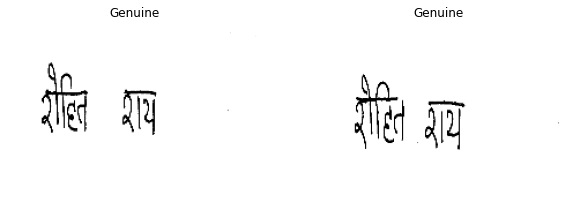

1/1 [==============================] - 0s 27ms/step
Difference Score =  0.44155794
Its a Genuine Signature


In [103]:
predict_score()

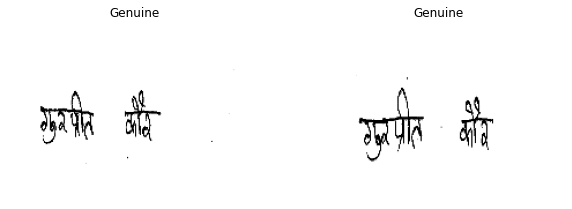

1/1 [==============================] - 0s 24ms/step
Difference Score =  0.078954905
Its a Genuine Signature


In [133]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()

In [ ]:
predict_score()